In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#from tensorflow import keras
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers import Dropout

In [2]:
from sklearn.model_selection import train_test_split
# 引入數據
df = pd.read_csv('2393_202201-20230704.csv')
data = df.filter(['Open', 'High', 'Low', 'Close']).values
close_data = df.filter(['Close']).values
data
close_data

array([[53.400002],
       [52.599998],
       [52.700001],
       [52.200001],
       [51.799999],
       [52.5     ],
       [51.700001],
       [52.200001],
       [53.400002],
       [51.799999],
       [54.599998],
       [57.      ],
       [57.      ],
       [56.299999],
       [54.400002],
       [54.900002],
       [53.5     ],
       [53.599998],
       [53.700001],
       [54.5     ],
       [56.299999],
       [55.700001],
       [56.200001],
       [54.099998],
       [53.099998],
       [53.099998],
       [52.900002],
       [53.      ],
       [52.099998],
       [50.700001],
       [51.400002],
       [49.599998],
       [49.599998],
       [50.599998],
       [50.200001],
       [50.200001],
       [49.5     ],
       [48.      ],
       [46.700001],
       [47.650002],
       [48.349998],
       [48.      ],
       [48.5     ],
       [47.450001],
       [47.200001],
       [49.      ],
       [49.450001],
       [49.650002],
       [50.099998],
       [50.      ],


In [3]:
# 數據歸一化
scaler = MinMaxScaler()
close_scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_close_data = scaler.fit_transform(close_data)
scaled_data

array([[0.77254906, 0.78210125, 0.85376357, 0.84873957],
       [0.77647075, 0.74708172, 0.82795699, 0.81512596],
       [0.74117655, 0.72762647, 0.8193548 , 0.81932777],
       ...,
       [0.68627451, 0.66147857, 0.75483867, 0.75630255],
       [0.69411769, 0.68482499, 0.76344086, 0.77731096],
       [0.69411769, 0.68482499, 0.76344086, 0.77731096]])

In [5]:
#預測多維多步時，所需function
'''def create_dataset(data,n_predictions,n_next):
    '''
    #對數據進行維度處理
    '''
    dim = data.shape[1]
    train_X, train_Y = [], []
    for i in range(data.shape[0]-n_predictions-n_next-1):
        a = data[i:(i+n_predictions),:]
        train_X.append(a)
        tempb = data[(i+n_predictions):(i+n_predictions+n_next),:]
        b = []
        for j in range(len(tempb)):
            for k in range(dim):
                b.append(tempb[j,k])
        train_Y.append(b)
    train_X = np.array(train_X,dtype='float64')
    train_Y = np.array(train_Y,dtype='float64')

    return train_X, train_Y
'''

In [4]:
# 定義輸入和輸出序列長度
lookback = 20
lookhead = 5

#將數據轉換成可訓練維度
#預測多維多步時，所需function
#X_train, y_train = create_dataset(scaled_data, lookback, lookhead)

In [5]:
#預測一維多步
# 準備訓練數據和標籤
X_train = []
y_train = []
for i in range(lookback, len(data) - lookhead + 1):
    X_train.append(scaled_data[i - lookback:i])

for i in range(lookback, len(data) - lookhead + 1):
    y_train.append(scaled_close_data[i:i + lookhead])

# 轉換為NumPy數組
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train
y_train

array([[[0.97058819],
        [0.94537819],
        [0.9663866 ],
        [0.87815117],
        [0.83613436]],

       [[0.94537819],
        [0.9663866 ],
        [0.87815117],
        [0.83613436],
        [0.83613436]],

       [[0.9663866 ],
        [0.87815117],
        [0.83613436],
        [0.83613436],
        [0.82773117]],

       ...,

       [[0.71008394],
        [0.75630255],
        [0.70168074],
        [0.75210075],
        [0.75630255]],

       [[0.75630255],
        [0.70168074],
        [0.75210075],
        [0.75630255],
        [0.77731096]],

       [[0.70168074],
        [0.75210075],
        [0.75630255],
        [0.77731096],
        [0.77731096]]])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape[1])
print(X_train.shape[2])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

20
4
(268, 20, 4)
(268, 5, 1)
(68, 20, 4)
(68, 5, 1)


In [8]:
# 定義LSTM模型
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))#丟掉20%神經元
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))#丟掉20%神經元
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))#丟掉20%神經元
model.add(LSTM(units=50))
#model.add(Dense(20))  # 輸出個特徵
model.add(Dense(lookhead))  # 輸出個特徵
model.compile(optimizer='adam', loss='mse')

In [9]:
# 訓練模型
model.fit(X_train, y_train, epochs=200, batch_size=128, validation_data=(X_test, y_test))

Epoch 1/200
3/3 [==============================] - 8s 744ms/step - loss: 0.1282 - val_loss: 0.0231
Epoch 2/200
3/3 [==============================] - 0s 67ms/step - loss: 0.0241 - val_loss: 0.0127
Epoch 3/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0177 - val_loss: 0.0202
Epoch 4/200
3/3 [==============================] - 0s 37ms/step - loss: 0.0177 - val_loss: 0.0087
Epoch 5/200
3/3 [==============================] - 0s 37ms/step - loss: 0.0111 - val_loss: 0.0103
Epoch 6/200
3/3 [==============================] - 0s 37ms/step - loss: 0.0126 - val_loss: 0.0096
Epoch 7/200
3/3 [==============================] - 0s 37ms/step - loss: 0.0109 - val_loss: 0.0090
Epoch 8/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0102 - val_loss: 0.0077
Epoch 9/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0103 - val_loss: 0.0076
Epoch 10/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0098 - val_loss: 0.0079
Epoch 11/200
3/3 [

Epoch 84/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0048 - val_loss: 0.0035
Epoch 85/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0047 - val_loss: 0.0035
Epoch 86/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0047 - val_loss: 0.0035
Epoch 87/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0047 - val_loss: 0.0034
Epoch 88/200
3/3 [==============================] - 0s 35ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 89/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0053 - val_loss: 0.0042
Epoch 90/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0052 - val_loss: 0.0039
Epoch 91/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0055 - val_loss: 0.0034
Epoch 92/200
3/3 [==============================] - 0s 35ms/step - loss: 0.0052 - val_loss: 0.0035
Epoch 93/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0049 - val_loss: 0.0042
Epoch 94/2

3/3 [==============================] - 0s 37ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 167/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0044 - val_loss: 0.0031
Epoch 168/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0042 - val_loss: 0.0030
Epoch 169/200
3/3 [==============================] - 0s 37ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 170/200
3/3 [==============================] - 0s 37ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 171/200
3/3 [==============================] - 0s 36ms/step - loss: 0.0045 - val_loss: 0.0028
Epoch 172/200
3/3 [==============================] - 0s 37ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 173/200
3/3 [==============================] - 0s 37ms/step - loss: 0.0041 - val_loss: 0.0030
Epoch 174/200
3/3 [==============================] - 0s 37ms/step - loss: 0.0045 - val_loss: 0.0030
Epoch 175/200
3/3 [==============================] - 0s 38ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 176/200


In [11]:
#預測多維多步時，所需function
#將數據還原成原本維度
'''
def reshape_y_hat(y_hat,dim):
    re_y = []
    i = 0
    while i < len(y_hat):
        tmp = []
        for j in range(dim):
            tmp.append(y_hat[i+j])
        i = i + dim
        re_y.append(tmp)
    re_y = np.array(re_y,dtype='float64')
    return  re_y
'''

In [10]:
predictions = model.predict(X_test)

3/3 [==============================] - 2s 27ms/step


ValueError: non-broadcastable output operand with shape (340,1) doesn't match the broadcast shape (340,4)

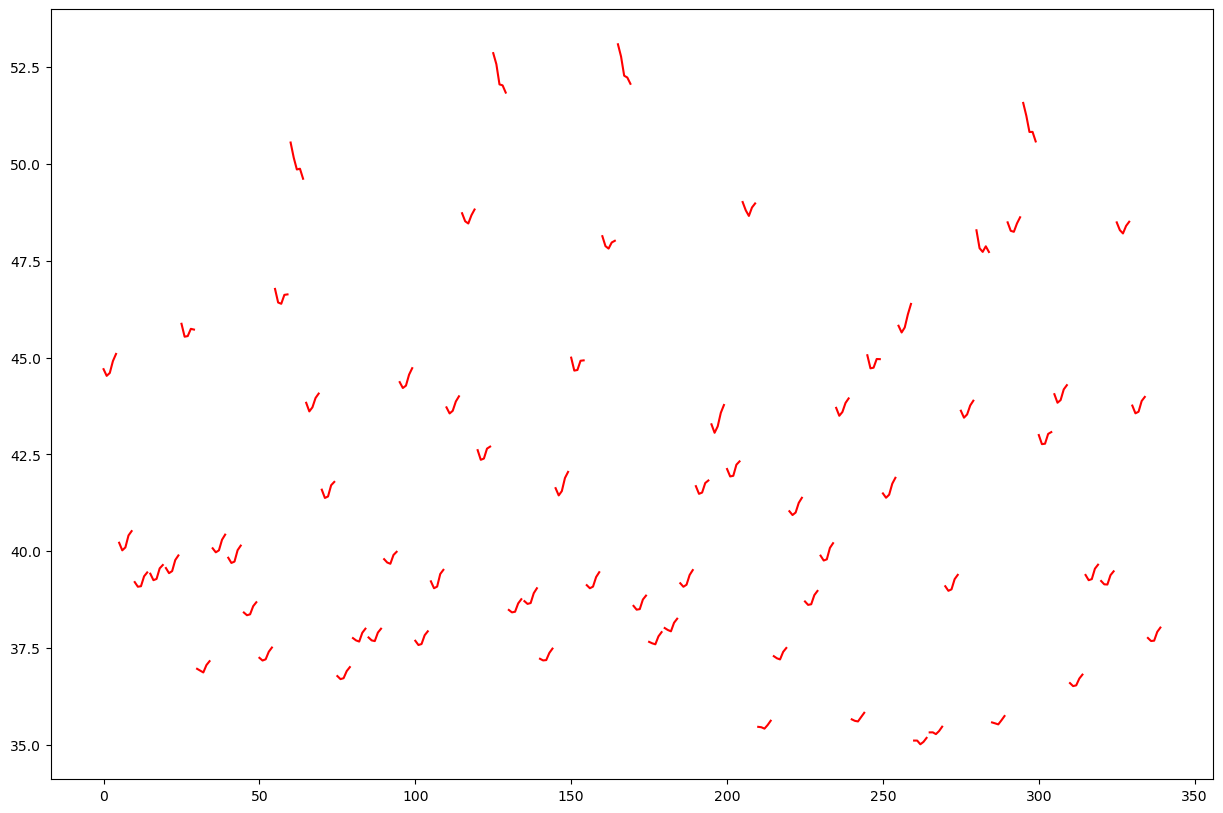

In [11]:
plt.figure(figsize = (15,10))

for i in range(0,len(predictions)):
    plt.plot([x + i*lookhead for x in range(len(predictions[i]))],
             scaler.inverse_transform(predictions[i].reshape(-1,1)), color='r')
    
plt.plot(0, scaler.inverse_transform(predictions[i].reshape(-1,1))[0], color='r', label='Prediction') #only to place the label
    
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), label='Target')
plt.legend(loc='best')
plt.show()

In [12]:
print(predictions)

[[0.51576954 0.51311016 0.5154911  0.5105906  0.52066505]
 [0.30110008 0.30675688 0.30936122 0.30246493 0.31569695]
 [0.262665   0.26390806 0.267082   0.26298624 0.27273816]
 [0.26538494 0.26957178 0.27281797 0.266048   0.2773944 ]
 [0.27916867 0.2815282  0.2832992  0.28005573 0.290752  ]
 [0.5701085  0.5610892  0.5668007  0.5508499  0.5526408 ]
 [0.16437049 0.16524366 0.16725653 0.16515343 0.17148024]
 [0.3072957  0.30672958 0.30836755 0.30771032 0.31668556]
 [0.2893054  0.29200745 0.2941779  0.29012692 0.30148295]
 [0.23455927 0.23238516 0.23450679 0.23431489 0.24078783]
 [0.1782124  0.1793133  0.17916852 0.17981286 0.18480247]
 [0.59998214 0.5948163  0.60033756 0.58096147 0.58690673]
 [0.815144   0.7915457  0.79114044 0.7527131  0.7479399 ]
 [0.47629783 0.47058722 0.47572225 0.46985272 0.4758226 ]
 [0.36388868 0.36564147 0.37032095 0.3619486  0.37321046]
 [0.15649764 0.15890661 0.15877451 0.15831293 0.1632164 ]
 [0.19966511 0.2003893  0.20188652 0.20055522 0.2079238 ]
 [0.19973622 0